# Algoritmos de busqueda

In [1]:
#librerias
import networkx as nx #Libreria de redes
import matplotlib.pyplot as plt #libreira para graficar
import pandas as pd #libreria de manejo de datos
import scipy as sp #libreria python cientifico
import numpy as np #libreira manejo de matrices
import random #generador de elecciones aleatorias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from community import community_louvain
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
import openpyxl

### Dataframe, red y caracteristicas

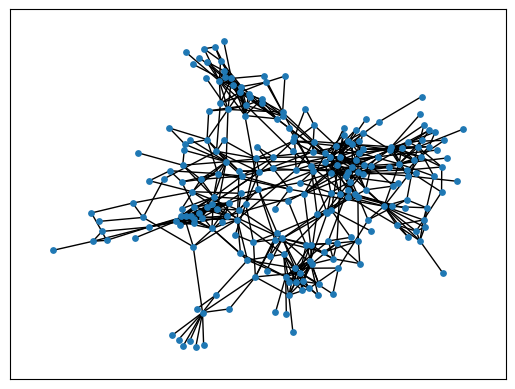

In [2]:
Redani=pd.read_csv("CN_spa.csv",header=None,sep=",") #importar dataframe, lista de enlaces
G = nx.from_pandas_edgelist(Redani,source=0,target=1) #Red
grafo=nx.draw_networkx(G,with_labels=False,node_size=15)#Dibujar la red

In [3]:
print("numero de nodos:",G.number_of_nodes(), "numero de enlaces:",G.number_of_edges())
adyacencia=nx.adjacency_matrix(G).todense()


numero de nodos: 236 numero de enlaces: 611


### Red auxiliar sin nombres

In [4]:
G1 = nx.from_numpy_array(adyacencia)

In [5]:
print("numero de nodos:",G1.number_of_nodes(), "numero de enlaces:",G1.number_of_edges())

numero de nodos: 236 numero de enlaces: 611


### Distr de grado

In [6]:
degree=nx.degree(G1)
degree1=pd.DataFrame(degree)
listdegree1=list(degree)
degree1

,0,1
0,0,8
1,1,3
2,2,14
3,3,2
4,4,10
...,...,...
231,231,12
232,232,1
233,233,7
234,234,4


### Grado medio

In [7]:
meandegree=np.mean(degree1.iloc[:,1])
meandegree

5.177966101694915

### Histograma de frecuencias de grado

Text(0.5, 1.0, 'Histograma de frecuencias de grado')

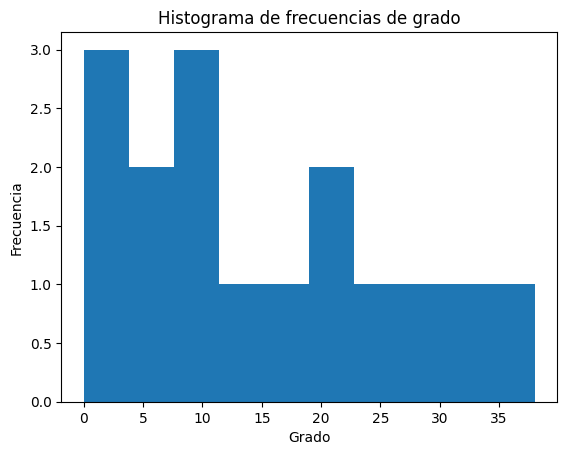

In [8]:
hist=nx.degree_histogram(G1)
plt.hist(hist)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias de grado')

### Coeficiente de clustering

In [9]:
coef_clustering=nx.average_clustering(G1)
coef_clustering

0.3296154175391464

### Red con clusters diferenciados

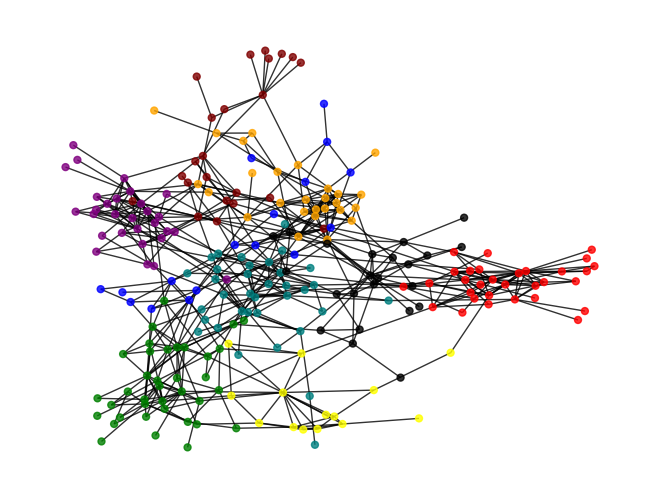

In [10]:
cluster=community_louvain.best_partition(G1)
unique_coms = np.unique(list(cluster.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster[node]] for node in G1.nodes()]
nx.draw(G1, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

### Shortest path

In [11]:
caminomcort=nx.average_shortest_path_length(G1)
caminomcort

4.4232960692390915

La red tiene un camino mas corto promedio de 4.423, un coeficiente de clustering promedio de 0.329, del histograma anterior se puede ver que existen pocos nodos con alto grado, mientras que hay muchos con un grado bajo, esto deja a una red de tipo small-world. wattz-strogatz 1988.

## Busqueda por Grado de nodo

In [12]:
def SRW(p,mc,ms):
    return p*ms+(1-p)*mc

In [13]:
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)
TransMatrixDF=pd.DataFrame(TransMatrix)
TransMatrixDF.to_csv('transitionM.csv')
T=TransMatrixDF.to_numpy()

In [14]:
degree = adyacencia.sum(axis=1)
sum_degree = degree.sum()
transition_matrix = degree / sum_degree
transition_matrix = transition_matrix.reshape((-1, 1)) * np.ones(adyacencia.shape)

Corregir esta celda por que hay un problema con a indexacion de la matriz que se va a obtener, la verdad no se que puede ser pues las dimensiones son las mismas que en el caso siguiente

In [15]:
p=0.05
m1=SRW(p,T,transition_matrix)
autovalores, autovectores = sp.linalg.eig(m1.T)
autovalores

array([ 1.02117905e+00+0.00000000e+00j, -8.26364976e-01+0.00000000e+00j,
       -7.50923028e-01+0.00000000e+00j, -7.48446208e-01+0.00000000e+00j,
        9.14332460e-01+0.00000000e+00j,  9.11139226e-01+0.00000000e+00j,
        8.93263465e-01+0.00000000e+00j,  8.64134776e-01+0.00000000e+00j,
        8.44218060e-01+0.00000000e+00j,  8.32448887e-01+0.00000000e+00j,
        8.20884293e-01+0.00000000e+00j,  8.14644297e-01+0.00000000e+00j,
        7.84462550e-01+0.00000000e+00j,  7.72564727e-01+0.00000000e+00j,
        7.50190981e-01+0.00000000e+00j,  7.24633350e-01+0.00000000e+00j,
        7.05585171e-01+0.00000000e+00j,  6.98513908e-01+0.00000000e+00j,
        6.65044154e-01+0.00000000e+00j,  6.58454125e-01+0.00000000e+00j,
        6.37889334e-01+0.00000000e+00j,  6.27673545e-01+0.00000000e+00j,
        6.19197596e-01+0.00000000e+00j,  6.11896247e-01+0.00000000e+00j,
        5.98560649e-01+0.00000000e+00j,  5.75750403e-01+0.00000000e+00j,
        5.89110268e-01+0.00000000e+00j, -6.54252148

## Busqueda de CRW

### CRW

#### RW

Para calcular un Random Wlaker es necesario obtener una matriz de transicion dada por:


$M_{ij}=\frac{L_{ij}}{\sum_{k=1}^{n}L_{kj}}$

El numerador es el grado del nodo, y $L$ la matriz de adyacencia.

In [16]:
def umbral(x):
    return 1 if x >= 0.1 else 0

In [17]:
TransMatrix=adyacencia/adyacencia.sum(axis=1,keepdims=True)

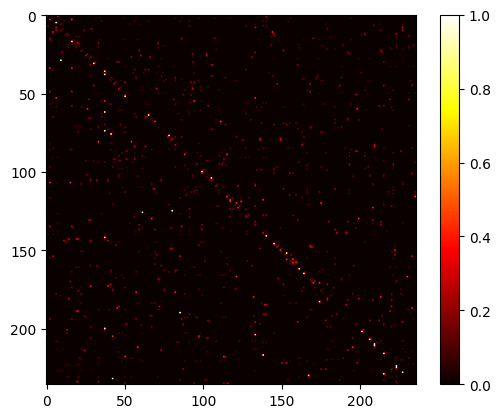

In [18]:
#Mapa de calor
plt.imshow(TransMatrixDF,cmap="hot",origin='upper')
plt.colorbar()

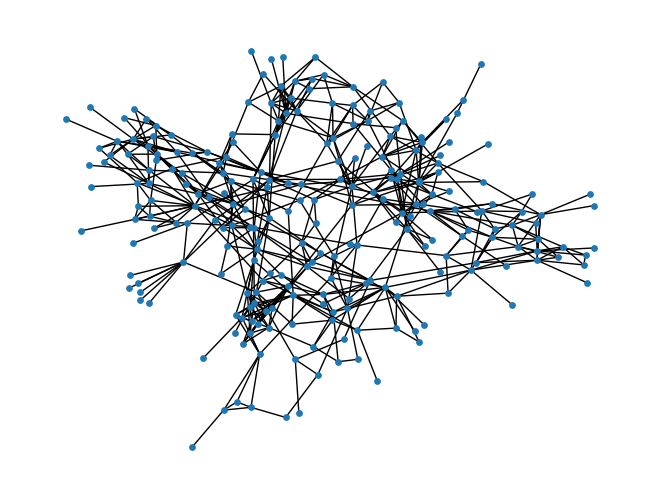

In [19]:
A= np.full((236, 236), 1/236)
p=0.05
m1=SRW(p,T,A)
autovalores, autovectores = np.linalg.eig(m1.T)
idx = np.where(np.isclose(autovalores, 1))[0][0]
estados_estacionarios = autovectores[:, idx] / np.sum(autovectores[:, idx])
# Aplicar la función de umbral a cada elemento de la matriz
A_ady = np.where(m1 >= 0.1, 1, 0)
g3=nx.from_numpy_array(A_ady)
nx.draw(g3,node_size=15)

(array([5., 1., 0., 1., 0., 2., 2., 2., 1., 1.]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

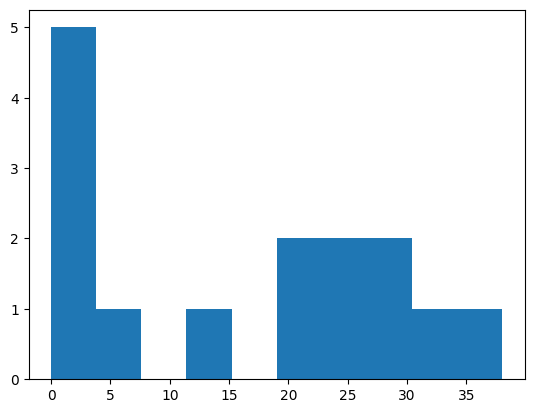

In [20]:
plt.hist(nx.degree_histogram(g3))

In [21]:
nx.average_clustering(g3)
nx.average_shortest_path_length(g3)

4.5653443923548505

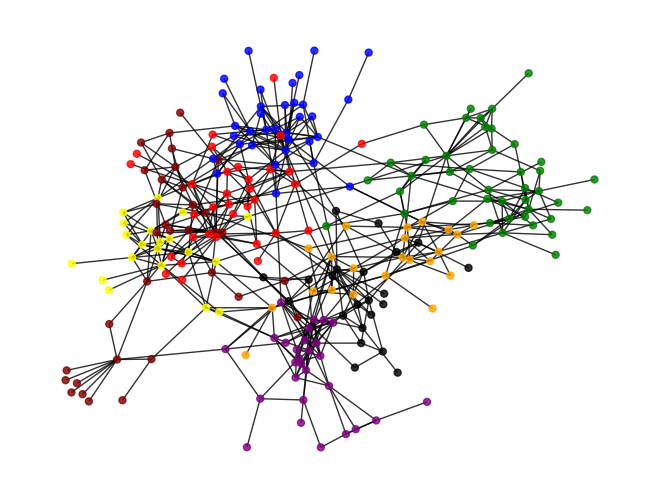

In [22]:
cluster1=community_louvain.best_partition(g3)
unique_coms = np.unique(list(cluster1.values()))
colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple','black','maroon','teal','brown']
color_map = [colors[cluster1[node]] for node in g3.nodes()]
nx.draw(g3, node_color=color_map, with_labels=False,node_size=25,alpha=0.8)

<Axes: >

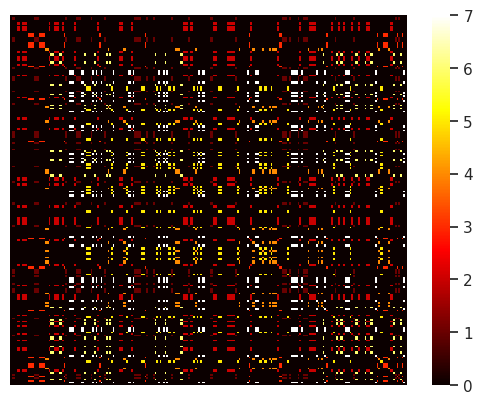

In [23]:
mask = np.zeros_like(A_ady)
for i, cluster_i in cluster1.items():
    for j, cluster_j in cluster1.items():
        if cluster_i == cluster_j:
            mask[i-1, j-1] = cluster_i

# Creamos el mapa de calor utilizando Seaborn
sns.set()
sns.heatmap(mask, cmap='hot', cbar=True, xticklabels=False, yticklabels=False)

In [24]:
print("el numero de enlaces es:",nx.number_of_edges(g3))

el numero de enlaces es: 558


In [31]:
posicion_actual = 0

# Definir el número de pasos a dar
num_pasos = 40
visitado=set()
nodosvistorden=[]
# Realizar el proceso de caminata aleatoria
for i in range(num_pasos):
    if posicion_actual not in visitado:
        visitado.add(posicion_actual)
        nodosvistorden.append(posicion_actual)
    # Obtener las probabilidades de transición desde la posición actual
    probs_transicion = m1[posicion_actual]
    # Elegir una nueva posición al azar utilizando las probabilidades de transición
    nueva_posicion = np.random.choice(np.arange(len(probs_transicion)), p=probs_transicion)
    # Actualizar la posición actual
    posicion_actual = nueva_posicion
    # Imprimir la posición actual

nodosvistorden

[0,
 1,
 140,
 191,
 138,
 185,
 7,
 4,
 56,
 84,
 11,
 144,
 39,
 105,
 32,
 160,
 196,
 227,
 10,
 6,
 133,
 8,
 24,
 192,
 182,
 208,
 213,
 108]